In [291]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import precision_score

In [5]:
df = pd.read_csv('songs.csv')
df.head()

,song,year,artist,genre,lyrics,length,commas,exclamations,colons,hyphens
0,the-ownerz,2007,gangstarr,Hip-Hop,"""One-two..""\n""One-two, shots to the chin.. kno...",1300,24,5,0,11
1,dead-sound-of-misery,2006,blind-guardian,Metal,It's dark\nLet's do it now\nBring in the siren...,1566,0,0,0,0
2,modred-s-song,2006,blind-guardian,Metal,I've lost my battle before it starts\nmy first...,996,1,0,1,0
3,the-ninth-wave,2015,blind-guardian,Metal,As dark night embraces\nWe are the nation\nI w...,2868,5,0,0,0
4,skills,2014,gangstarr,Hip-Hop,"Skills, skills, skills\n""My Microphone""\n""It's...",3351,22,0,0,3


In [38]:
X_train = df.drop(['lyrics','artist','song'], axis=1)
X_train = pd.get_dummies(X_train)
y_train = df[['artist']]

In [50]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [52]:
clf.score(X_train, y_train)

1.0

Скачайте набор данных с тремя переменными: sex, exang, num. Представьте, что при помощи дерева решений мы хотим классифицировать есть или нет у пациента заболевание сердца (переменная num), основываясь на двух признаках: пол (sex) и наличие/отсутсвие стенокардии (exang). Обучите дерево решений на этих данных, используйте entropy в качестве критерия.

Укажите, чему будет равняться значение Information Gain для переменной,  которая будет помещена в корень дерева.

В ответе необходимо указать число с точностью 3 знака после запятой.

In [2]:
df = pd.read_csv('train_data_tree.csv')
df.head()
X = df.drop(['num'], axis=1)
y = df[['num']]

In [3]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [ ]:
IG=E(Y)−E(Y|X)

E(Y)=−∑i=1npi∗log2(pi)

E(Y|X)=n1NE1+n2NE2

In [34]:
0.996-0.903*157/(157+81)-0.826*81/(157+81)

0.11920588235294116

In [36]:
#plt.figure(figsize=(40, 40),dpi=150)
#p = tree.plot_tree(clf, fontsize=40,filled=True,feature_names=list(X))

Итак, вам даны 2 numpy эррея с измеренными признаками ирисов и их принадлежностью к виду. Сначала попробуем примитивный способ с разбиением данных на 2 датасэта. Используйте функцию train_test_split для разделения имеющихся данных на тренировочный и тестовый наборы данных, 75% и 25% соответственно.
Затем создайте дерево dt с параметрами по умолчанию и обучите его на тренировочных данных, а после предскажите классы, к которым принадлежат данные из тестовой выборки, сохраните результат предсказаний в переменную predicted.

In [68]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris


iris = load_iris()
x = iris.data
y = iris.target

In [56]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train, y_train)
predicted = dt.predict(X_test)

Теперь задание - осуществите перебор всех деревьев на данных ириса по следующим параметрам:
максимальная глубина - от 1 до 10 уровней
минимальное число проб для разделения - от 2 до 10
минимальное число проб в листе - от 1 до 10
и сохраните в переменную best_tree лучшее дерево. Переменную с GridSearchCV назовите search

In [76]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [73]:
dt = tree.DecisionTreeClassifier()
parameters = {'max_depth': range(1,11), 'min_samples_split': range(2,11), 'min_samples_leaf': range(1,11)}
search = GridSearchCV(dt, parameters, cv=5)
search.fit(x,y)
best_tree = search.best_estimator_

In [77]:
dt = tree.DecisionTreeClassifier()
parameters = {'max_depth': range(1,11), 'min_samples_split': range(2,11), 'min_samples_leaf': range(1,11)}
search = RandomizedSearchCV(dt, parameters, cv=5)
search.fit(x,y)
best_tree = search.best_estimator_

events_train.csv - данные о действиях, которые совершают студенты со стэпами

step_id - id стэпа
user_id - анонимизированный id юзера
timestamp - время наступления события в формате unix date
action - событие, возможные значения: 
discovered - пользователь перешел на стэп
viewed - просмотр шага,
started_attempt - начало попытки решить шаг, ранее нужно было явно нажать на кнопку - начать решение, перед тем как приступить к решению практического шага
passed - удачное решение практического шага
submissions_train.csv - данные о времени и статусах сабмитов к практическим заданиям

step_id - id стэпа
timestamp - время отправки решения в формате unix date
submission_status - статус решения
user_id - анонимизированный id юзера

In [79]:
df = pd.read_csv('submissions_data_train.csv')

In [168]:
df1 = df[['user_id', 'timestamp']].groupby('user_id').max()
df2 = df1.merge(df)
df2[df2.submission_status=='wrong'].step_id.value_counts().head(1)

31978    156
Name: step_id, dtype: int64

In [169]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

Разминочная задачка - создайте модель RandomForestClassifier с 15 деревьями и максимальной глубиной равной 5 уровням, поместите её в переменную rf. Обучите модель на данных x_train и y_train, предскажите класс для наблюдений в x_test и поместите его в переменную predictions.

In [170]:
rf = RandomForestClassifier(n_estimators=15, max_depth = 5)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)

Воспользуемся данными о сердечных заболеваниях и обучим на них Random Forest. Постройте график важности переменных для классификации и выберите среди предложенных вариантов наиболее похожий.

В задании присутствует рандом, прогоните обучение случайного леса и построение графика несколько раз, чтобы увидеть изменения в важности фичей (5 самых важных обычно присутствуют в топе, просто в разном порядке).
Чтобы получить такой же график, как в правильном варианте ответа, сделайте

np.random.seed(0)

rf = RandomForestClassifier(10, max_depth=5)

Код для отрисовки важности фичей

imp = pd.DataFrame(rf.feature_importances_, index=x_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [171]:
df = pd.read_csv('heart.csv')

In [172]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


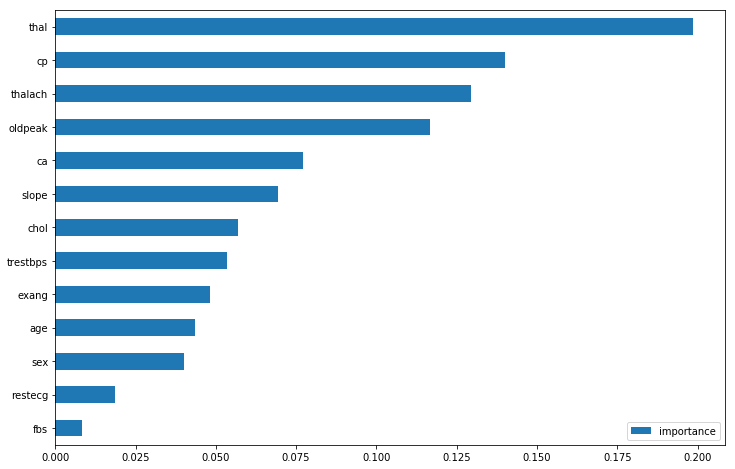

In [178]:
x = df.drop(['target'], axis=1)
y = df[['target']]
np.random.seed(0)
rf = RandomForestClassifier(10, max_depth=5)
rf.fit(x, y)

imp = pd.DataFrame(rf.feature_importances_, index=x.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

Переберите параметры с помощью GridSearchCV и обучите Random Forest на данных, указанных в предыдущем стэпе. Передайте в GridSearchCV модель с указанием random_state

RandomForestClassifier(random_state=0)
Параметры для выбора -

n_estimators: от 10 до 50 с шагом 10
max_depth: от 1 до 12 с шагом 2
min_samples_leaf: от 1 до 7
min_samples_split: от 2 до 9 с шагом 2
Укажите cv=3. Для ускорения расчётов в GridSearchCV можно указать n_jobs=-1, чтобы использовать все процессоры.

Какие параметры Random Forest были отобраны как наилучшие для решения на этих данных?

In [217]:
df = pd.read_csv('training_mush.csv')
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [232]:
x = df.drop(['class'], axis=1)
y = df[['class']]
parametrs = {'n_estimators': range(10,50,10), 'max_depth': range(1,12,2), 'min_samples_leaf' : range(1,7), \
             'min_samples_split': range(2,9,2)}
clf = RandomForestClassifier(random_state=0)
search = GridSearchCV(clf, parametrs, cv=3, n_jobs=-1)
search.fit(x,y.values.ravel())
best_model = search.best_estimator_

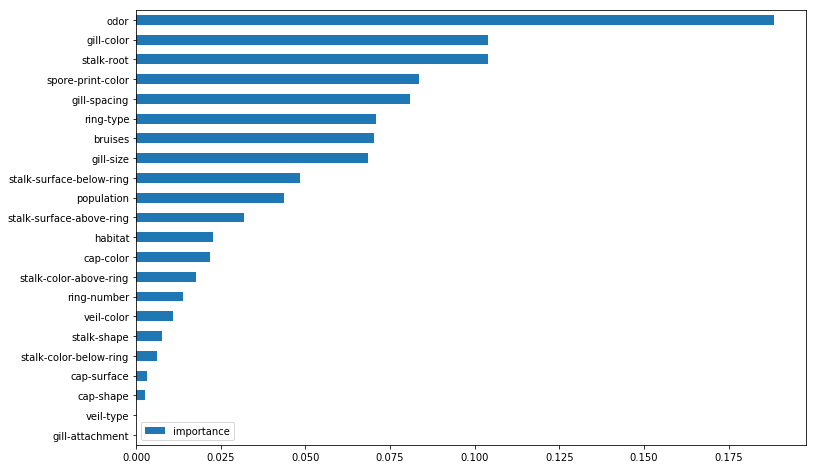

In [234]:
imp = pd.DataFrame(best_model.feature_importances_, index=x.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [235]:
df_test = pd.read_csv('testing_mush.csv')
df_test.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4


In [239]:
best_model.predict(df_test).sum()

976

In [249]:
y_pred = best_model.predict(df_test)

In [250]:
y_true = pd.read_csv('testing_y_mush.csv')

In [252]:
from sklearn.metrics import confusion_matrix
confl = confusion_matrix(y_true, y_pred)

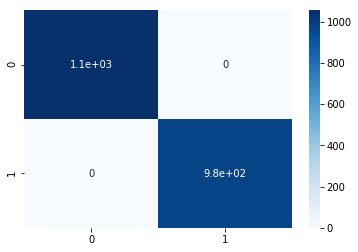

In [254]:
import seaborn as sns
sns.heatmap(confl, annot=True, cmap="Blues")

In [256]:
train = pd.read_csv('invasion.csv')
test = pd.read_csv('operative_information.csv')

In [262]:
x = train.drop(['class'], axis=1)
y = train[['class']]

In [267]:
parametrs = {'n_estimators': range(10,50), 'max_depth': range(1,50), 'min_samples_leaf' : range(1,50), \
             'min_samples_split': range(2,50)}
clf = RandomForestClassifier(random_state=0)
search = RandomizedSearchCV(clf, parametrs, cv=5, n_jobs=-1)
search.fit(x,y.values.ravel())
best_model = search.best_estimator_

In [286]:
ships_pred = pd.Series(best_model.predict(test))
ships_pred.value_counts()

fighter      675
transport    595
cruiser      230
dtype: int64

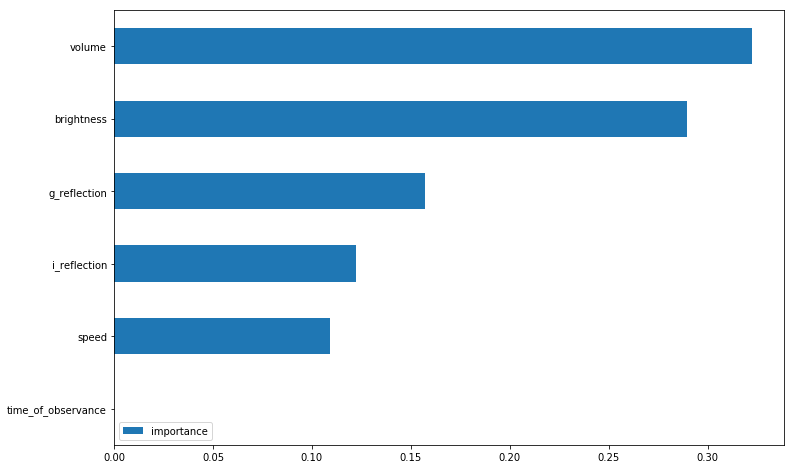

In [295]:
imp = pd.DataFrame(best_model.feature_importances_, index=x.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [ ]:
df = pd.read_csv("space_can_be_a_dangerous_place.csv")
df.head()

In [305]:
x, y = df.drop(['dangerous'],axis=1), df[['dangerous']]

In [306]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [307]:
parametrs = {'n_estimators': range(10,50), 'max_depth': range(1,50), 'min_samples_leaf' : range(1,50), \
             'min_samples_split': range(2,50)}
clf = RandomForestClassifier(random_state=0)
search = RandomizedSearchCV(clf, parametrs, cv=5, n_jobs=-1)
search.fit(x_train,y_train.values.ravel())
best_model = search.best_estimator_

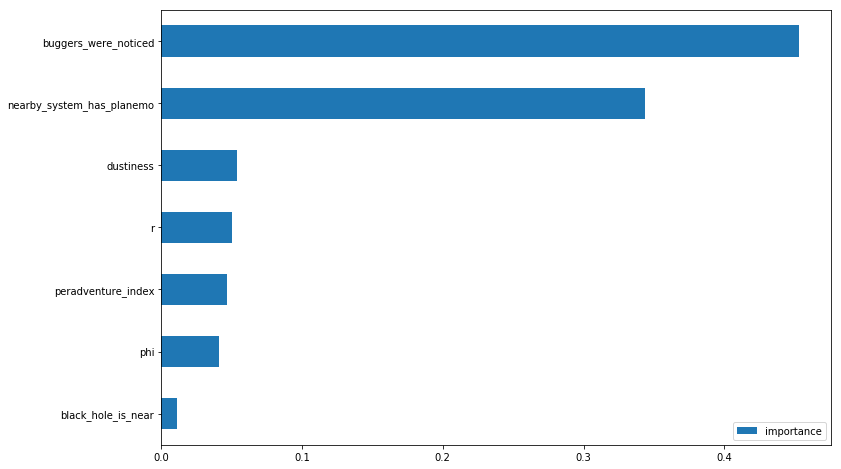

In [309]:
imp = pd.DataFrame(best_model.feature_importances_, index=x.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))